# **Email Spam or Ham Classification using Naı̈ve Bayes, KNN, and SVM**

**OBJECTIVE:**
To classify emails as spam or ham using three classification algorithms—Naı̈ve Bayes, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM)—and evaluate their performance using accuracy metrics and K-Fold cross-validation.

**IMPLEMENTATION STEPS:**

**1. Load the dataset**

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time

In [ ]:
TARGET_COLUMN = 'class'

df = pd.read_csv('/content/drive/MyDrive/ml-lab/spambase_csv.csv')
print(df.head())
print("Initial shape:", df.shape)

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

**2. Perform EDA (class balance, feature distributions).**

In [ ]:
# HANDLE MISSING VALUES
df = df.dropna(thresh=df.shape[1]//2)  # Drop rows with >50% missing
df.fillna(df.median(numeric_only=True), inplace=True)

# OUTLIER HANDLING (Z-Score)
def remove_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
    return df[(z_scores < threshold).all(axis=1)]

df = remove_outliers(df)
# print("After outlier removal:", df.shape)

In [ ]:
# FEATURE / TARGET SPLIT
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# ENCODE + STANDARDIZE
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_encoded)

**3. Split into train and test sets.**

In [ ]:
# TRAIN / VAL / TEST SPLIT
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**4. Train the following models:**
- Naı̈ve Bayes (Gaussian, Multinomial, Bernoulli)
- K-Nearest Neighbors (vary k, KDTree, BallTree)
- Support Vector Machine (Linear, Polynomial, RBF, Sigmoid kernels)

In [ ]:
def evaluate_model(name, model, X_train, X_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy :  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision:  {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall   :  {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score :  {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Training Time: {(end_time - start_time):.4f} seconds")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[0], cmap='Blues')
    axes[0].set_title('Confusion Matrix')

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend()
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()

**Naı̈ve Bayes** - Gaussian


GaussianNB Performance:
Accuracy :  0.8140
Precision:  0.8304
Recall   :  0.8347
F1 Score :  0.8139
Training Time: 0.0054 seconds


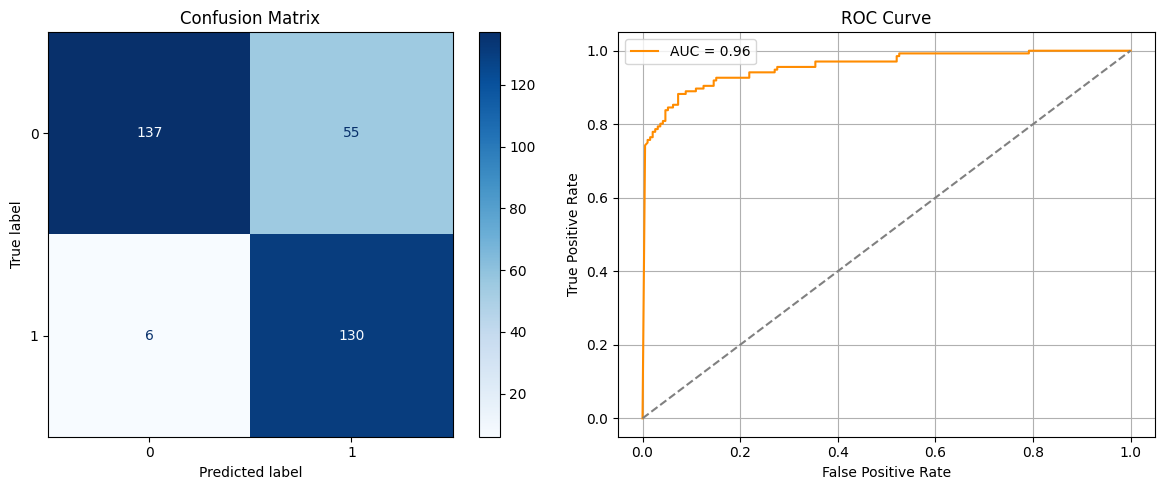

In [ ]:
evaluate_model("GaussianNB", GaussianNB(), X_train, X_test)

**Naı̈ve Bayes** - Multinomial


MultinomialNB Performance:
Accuracy :  0.7744
Precision:  0.7677
Recall   :  0.7665
F1 Score :  0.7671
Training Time: 0.0059 seconds


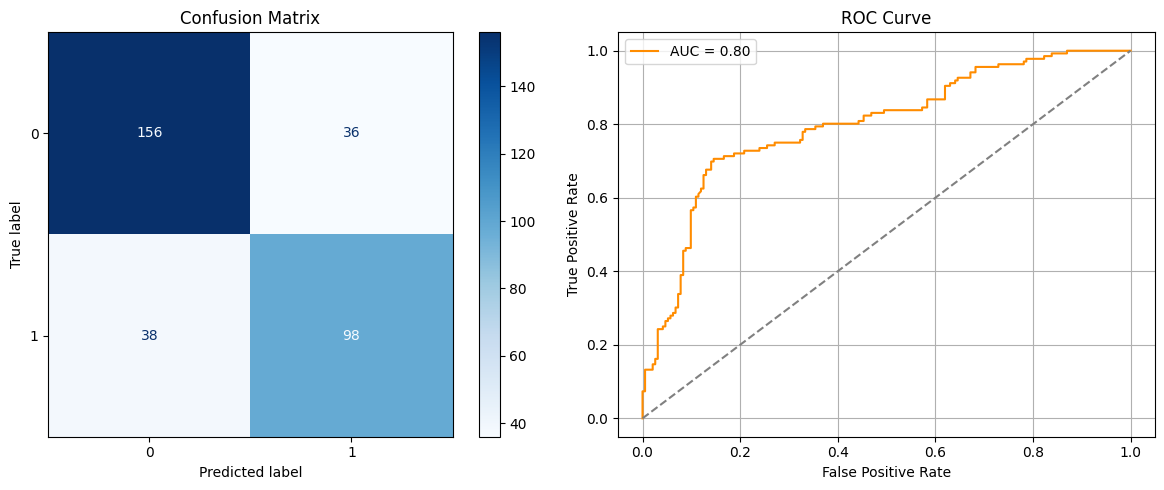

In [ ]:
evaluate_model("MultinomialNB", MultinomialNB(), X_train, X_test)

**Naı̈ve Bayes** - Bernoulli


BernoulliNB Performance:
Accuracy :  0.8811
Precision:  0.8837
Recall   :  0.8706
F1 Score :  0.8756
Training Time: 0.0118 seconds


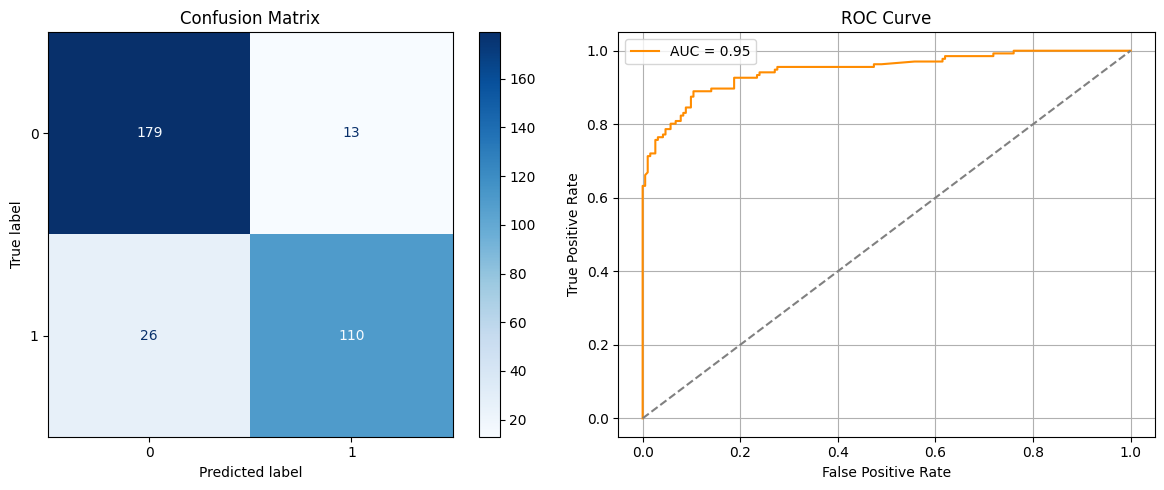

In [ ]:
evaluate_model("BernoulliNB", BernoulliNB(), X_train, X_test)

**K-Nearest Neighbors** - Varying k values [1, 3, 5, 7]


KNN (k=1) Performance:
Accuracy :  0.7683
Precision:  0.7616
Recall   :  0.7592
F1 Score :  0.7603
Training Time: 0.0094 seconds


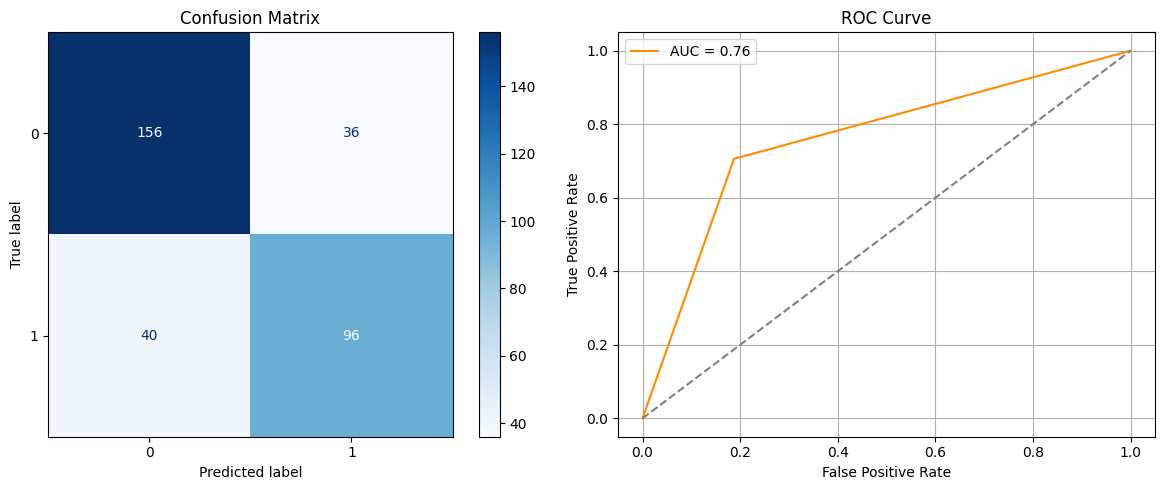


KNN (k=3) Performance:
Accuracy :  0.7591
Precision:  0.7524
Recall   :  0.7482
F1 Score :  0.7499
Training Time: 0.0045 seconds


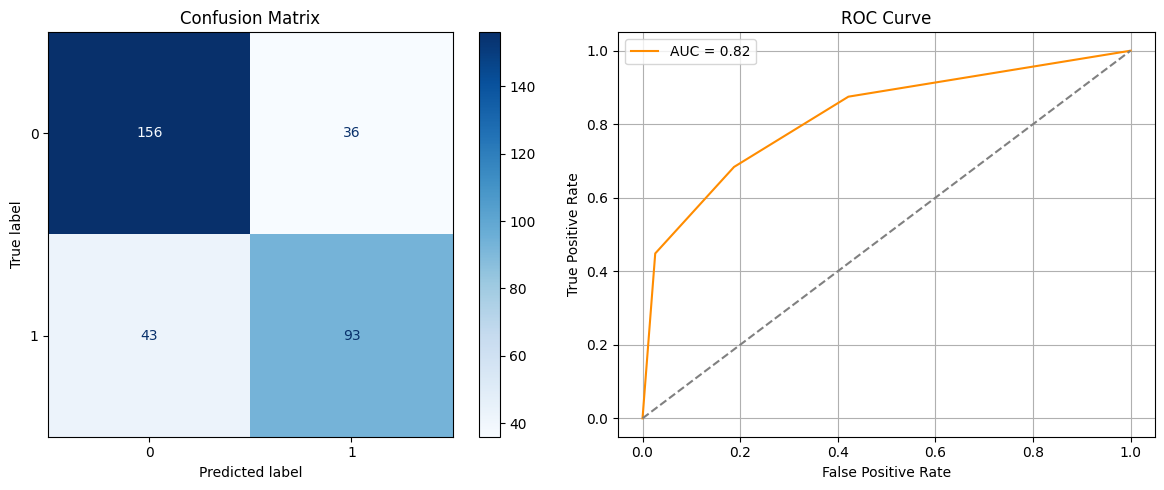


KNN (k=5) Performance:
Accuracy :  0.7622
Precision:  0.7572
Recall   :  0.7475
F1 Score :  0.7508
Training Time: 0.0036 seconds


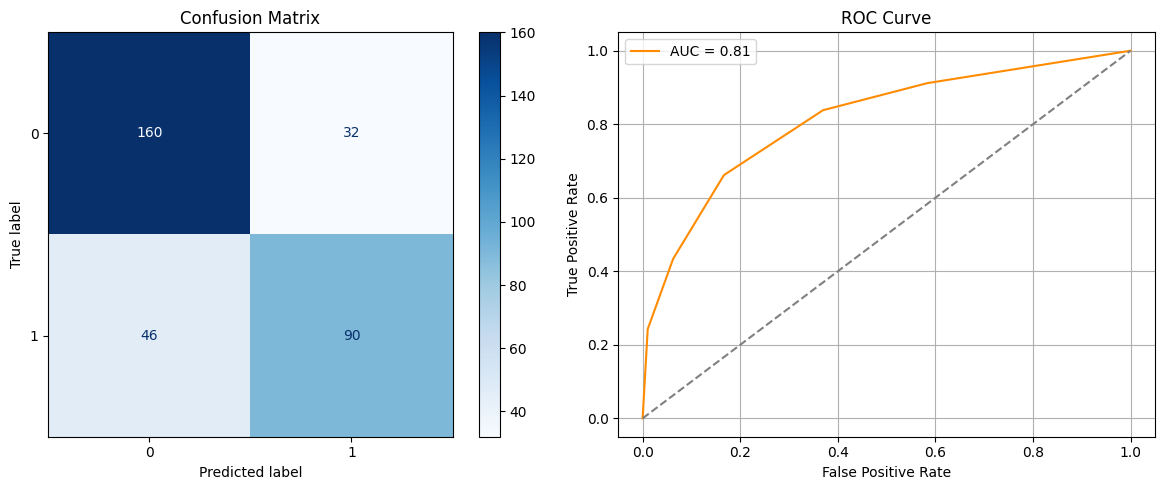


KNN (k=7) Performance:
Accuracy :  0.7561
Precision:  0.7528
Recall   :  0.7381
F1 Score :  0.7423
Training Time: 0.0048 seconds


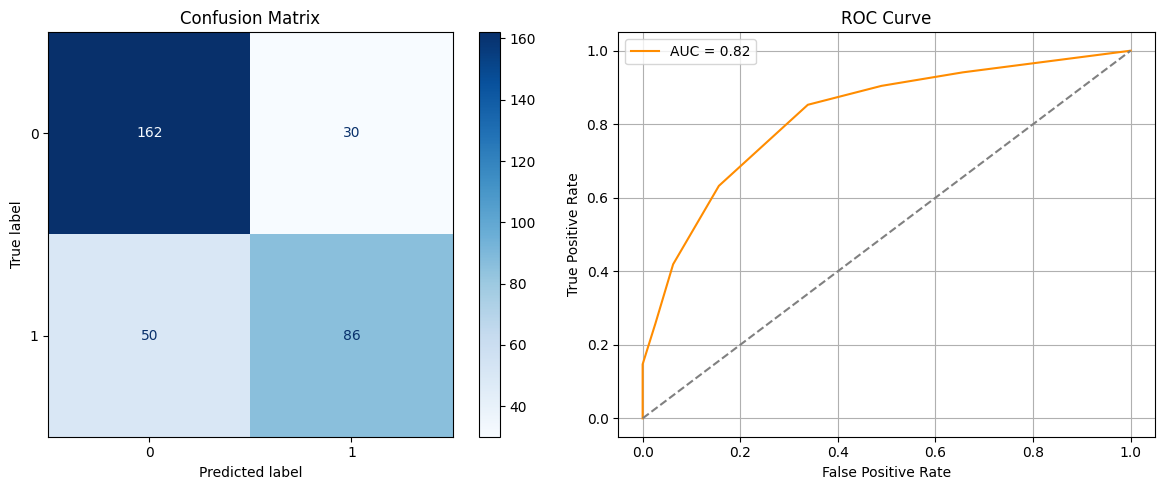

In [ ]:
for k in [1, 3, 5, 7]:
    evaluate_model(f"KNN (k={k})", KNeighborsClassifier(n_neighbors=k), X_train, X_test)

**K-Nearest Neighbors** - KDTree


KNN (KDTree) Performance:
Accuracy :  0.7622
Precision:  0.7572
Recall   :  0.7475
F1 Score :  0.7508
Training Time: 0.0142 seconds


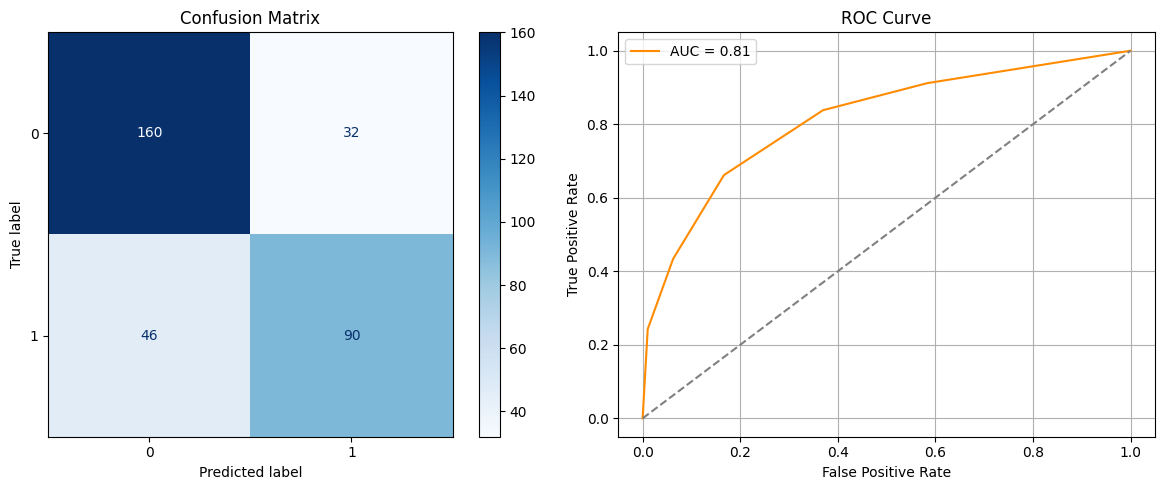

In [ ]:
evaluate_model("KNN (KDTree)", KNeighborsClassifier(algorithm='kd_tree'), X_train, X_test)

**K-Nearest Neighbors** - BallTree


KNN (BallTree) Performance:
Accuracy :  0.7622
Precision:  0.7572
Recall   :  0.7475
F1 Score :  0.7508
Training Time: 0.0103 seconds


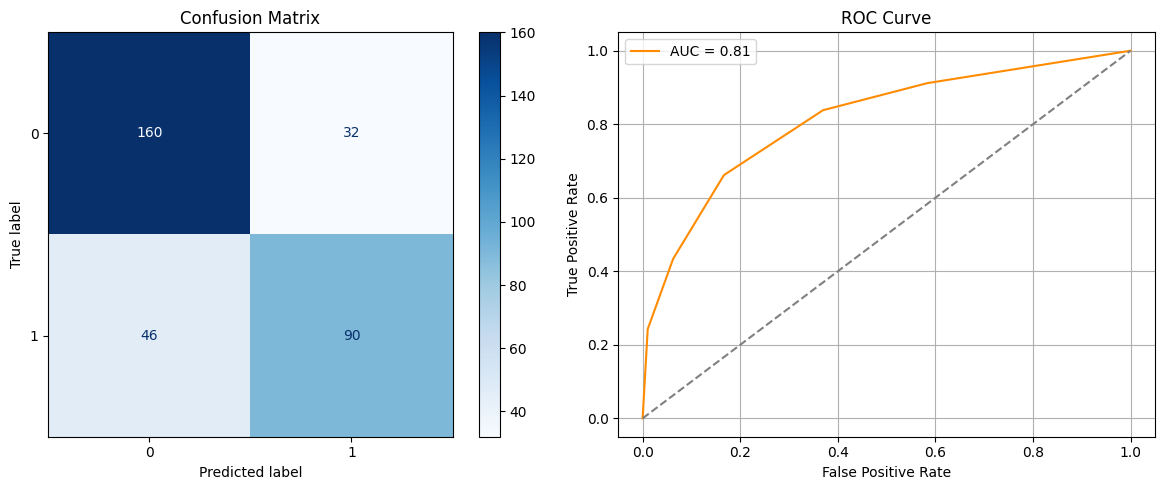

In [ ]:
evaluate_model("KNN (BallTree)", KNeighborsClassifier(algorithm='ball_tree'), X_train, X_test)

In [ ]:
grid = GridSearchCV(SVC(kernel='linear', probability=False), {'C': [0.01, 0.1, 1]}, cv=5)
grid.fit(X_train, y_train)

C = grid.best_params_['C']
print("Best C:", C)

Best C: 1


**Support Vector Machine** - Linear


SVM (Linear) Performance:
Accuracy :  0.9268
Precision:  0.9353
Recall   :  0.9161
F1 Score :  0.9231
Training Time: 398.0380 seconds


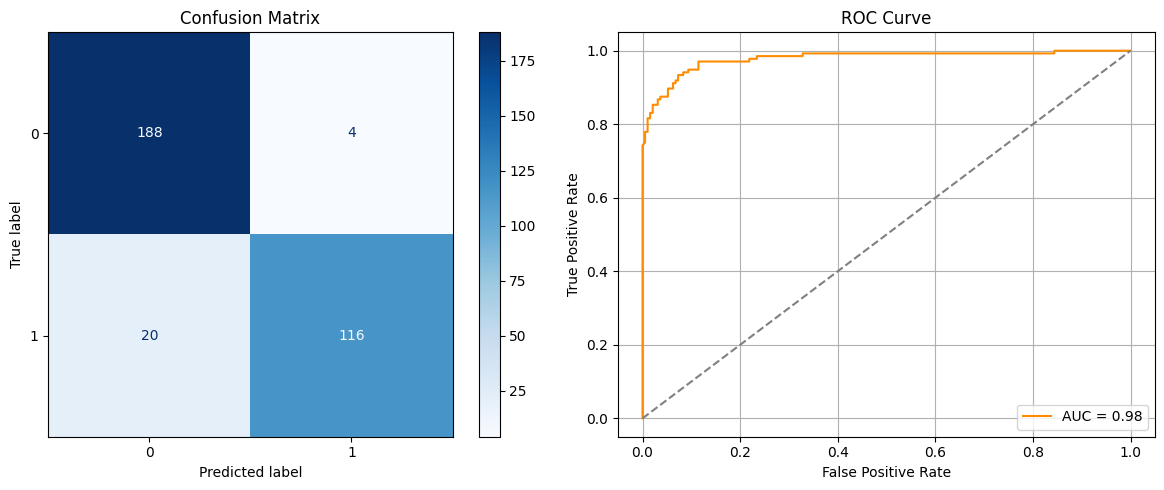

In [ ]:
evaluate_model("SVM (Linear)", SVC(kernel='linear', C=C, probability=True), X_train, X_test)

**Support Vector Machine** - Polynomial


SVM (Polynomial) Performance:
Accuracy :  0.6957
Precision:  0.7111
Recall   :  0.5726
F1 Score :  0.5476
Training Time: 1.1503 seconds

Gamma used: scale


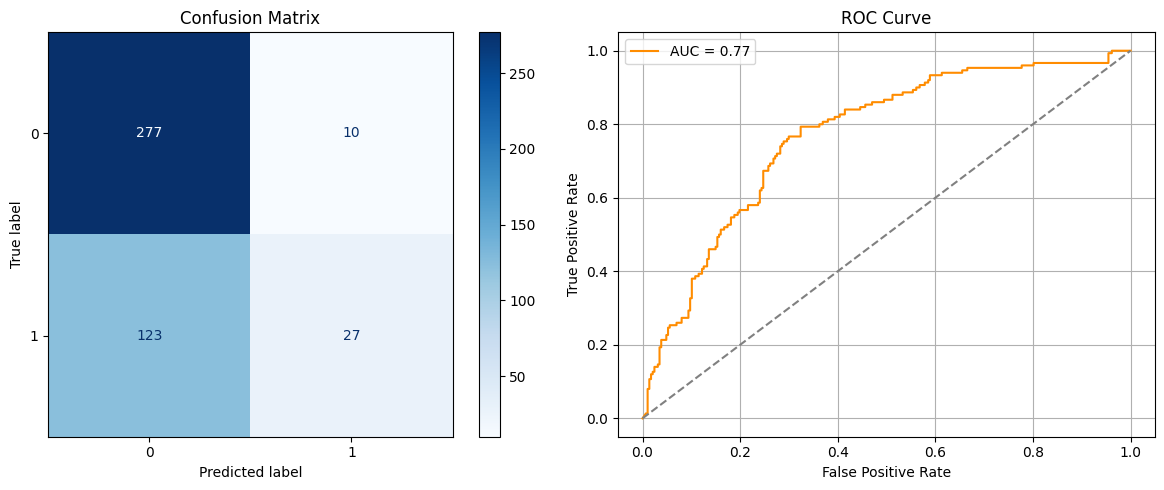

In [ ]:
evaluate_model("SVM (Polynomial)", SVC(kernel='poly', C=C, gamma='scale', degree=3, probability=True), X_train, X_test)

**Support Vector Machine** - RBF


SVM (RBF) Performance:
Accuracy :  0.7872
Precision:  0.7640
Recall   :  0.7648
F1 Score :  0.7644
Training Time: 1.5646 seconds

Gamma used: auto


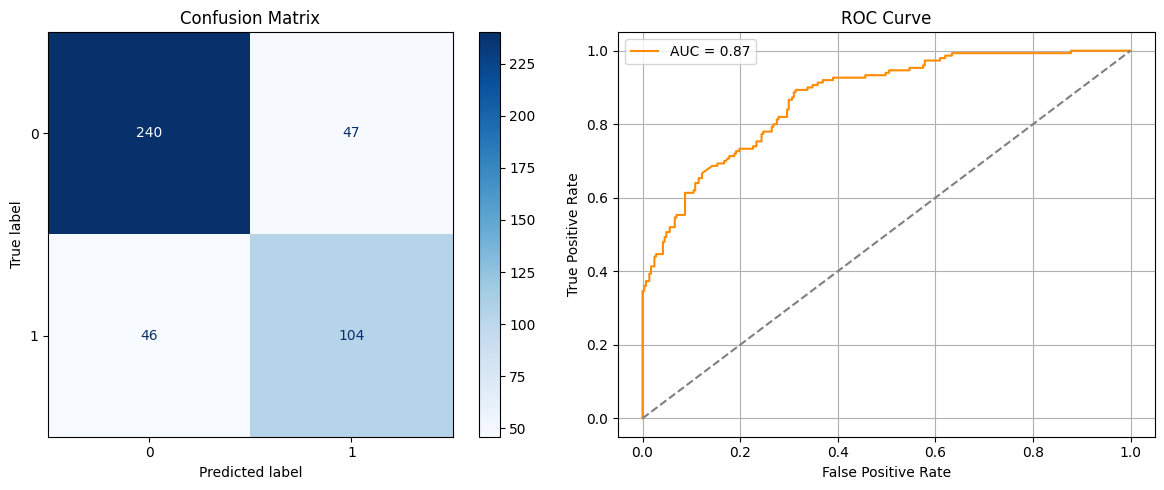

In [ ]:
evaluate_model("SVM (RBF)", SVC(kernel='rbf', C=C, gamma='auto', probability=True), X_train, X_test)

**Support Vector Machine**: Sigmoid kernel


SVM (Sigmoid) Performance:
Accuracy :  0.4177
Precision:  0.3017
Recall   :  0.3643
F1 Score :  0.3224
Training Time: 0.5035 seconds


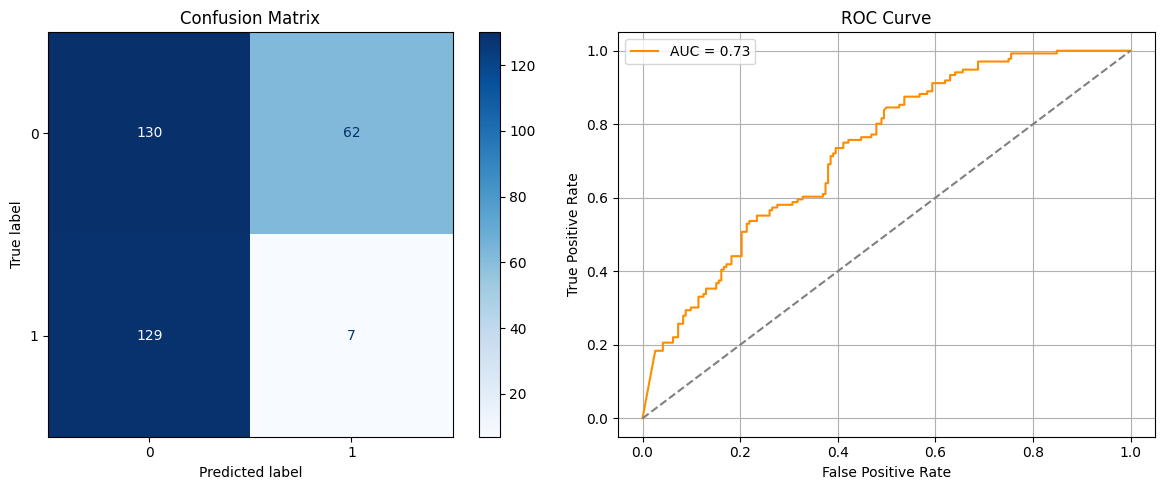

In [ ]:
evaluate_model("SVM (Sigmoid)", SVC(kernel='sigmoid', C=C, gamma='auto', probability=True), X_train, X_test)

**K-Fold Cross Validation**

In [ ]:
models = {
    "Naive Bayes": BernoulliNB(),
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "SVM": SVC(kernel='linear', C=C, probability=True)
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {name: [] for name in models}

for fold, (train_idx, test_idx) in enumerate(kf.split(X_encoded), start=1):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results[name].append(acc)
        print(f"Fold {fold} - {name} Accuracy: {acc:.4f}")
    print()

print("\nAverage:")
for name, scores in results.items():
    avg_acc = sum(scores) / len(scores)
    print(f"{name}: {avg_acc:.4f}")

Fold 1 - Naive Bayes Accuracy: 0.8627
Fold 1 - KNN Accuracy: 0.7643
Fold 1 - SVM Accuracy: 0.9268

Fold 2 - Naive Bayes Accuracy: 0.8993
Fold 2 - KNN Accuracy: 0.7712
Fold 2 - SVM Accuracy: 0.9268

Fold 3 - Naive Bayes Accuracy: 0.8673
Fold 3 - KNN Accuracy: 0.7666
Fold 3 - SVM Accuracy: 0.9108

Fold 4 - Naive Bayes Accuracy: 0.8810
Fold 4 - KNN Accuracy: 0.7529
Fold 4 - SVM Accuracy: 0.9176

Fold 5 - Naive Bayes Accuracy: 0.8947
Fold 5 - KNN Accuracy: 0.8009
Fold 5 - SVM Accuracy: 0.9268


Average:
Naive Bayes: 0.8810
KNN: 0.7712
SVM: 0.9217
